In [32]:
import numpy as np
import pandas as pd
import random
import graphviz
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score

亂數生成一個DataFrame並遵行以下規則進行邏輯判斷決定要不要去上課
![title](規則.png)

In [33]:
a = [0] * 1000
tr = {'天氣' : a,
         '上課或考試' : a,
         '睡過頭時間(hr)' : a,
         '上課' : a
      }
train = pd.DataFrame(tr)
for i in range(1000):
    train.iloc[i,0] = random.randint(0,1)
    train.iloc[i,1] = random.randint(0,2)
    train.iloc[i,2] = random.randint(0,1)
    if train.iloc[i,2] == 1:
        train.iloc[i,2] = random.uniform(0,2)
for i in range(1000):
    if (train.iloc[i,1] == 2) & (train.iloc[i,2] == 0): #1
        train.iloc[i,3] = 1
    elif (train.iloc[i,1] == 2) & (train.iloc[i,2] > 1): #2
        train.iloc[i,3] = 0
    elif (train.iloc[i,1] == 2) & (train.iloc[i,2] <= 1): #3
        train.iloc[i,3] = 1
    elif (train.iloc[i,1] == 1) & (train.iloc[i,2] == 0): #4
        train.iloc[i,3] = 1
    elif (train.iloc[i,1] == 1) & (train.iloc[i,2] != 0): #5
        train.iloc[i,3] = 0
    elif (train.iloc[i,0] == 1) & (train.iloc[i,1] == 0): #6
        train.iloc[i,3] = 0
    elif (train.iloc[i,0] == 0) & (train.iloc[i,1] == 0) & (train.iloc[i,2] == 0): #7
        train.iloc[i,3] = 1
    elif (train.iloc[i,0] == 0) & (train.iloc[i,1] == 0) & (train.iloc[i,2] != 0): #8
        train.iloc[i,3] = 0
train_data = train[0:]
train_data['上課或考試'] = train_data['上課或考試'].map({0 : '上課',1 : '小考',2 : '期中期末'})
train_data['天氣'] = train_data['天氣'].map({0 : '沒下雨',1 : '下雨'})
train_data['上課'] = train_data['上課'].map({0 : '不去',1 : '去'})
train_data.head(10)


,天氣,上課或考試,睡過頭時間(hr),上課
0,下雨,小考,0.000000,去
1,沒下雨,上課,0.000000,去
2,沒下雨,期中期末,0.000000,去
3,沒下雨,上課,1.871851,不去
4,下雨,上課,0.000000,不去
5,下雨,上課,0.000000,不去
6,沒下雨,上課,0.000000,去
7,下雨,小考,0.000000,去
8,下雨,小考,1.881652,不去
9,沒下雨,小考,0.000000,去


正確率: 1.0


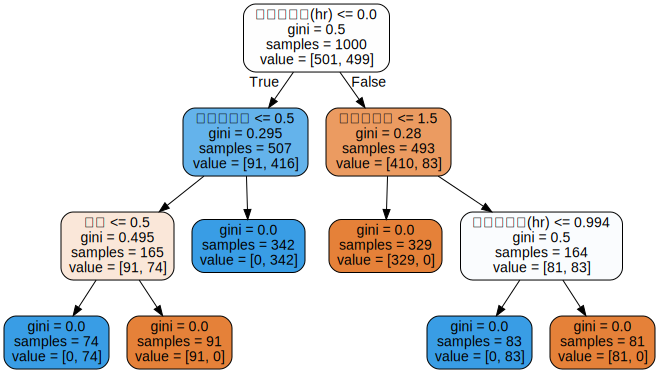

In [34]:
dtree = DecisionTreeClassifier()
X = train[['天氣','上課或考試','睡過頭時間(hr)']]
y = train['上課']
dtree.fit(X,y)
y_predict = dtree.predict(X)
print('正確率:',accuracy_score(y,y_predict))
#畫圖
a = export_graphviz(dtree,out_file =None,filled = True,rounded=True,feature_names=['天氣','上課或考試','睡過頭時間(hr)'])
graph = graphviz.Source(a)
graph

決策的順序有點改變，但不違反原本的規則。
我認為，因為我的參數很少，而且我假設去上課只會依據這幾個原則，其實算一下組合也只有幾種可能而已，所以很容易就可以預測出正確答案。
而現實中的資料，例如鐵達尼號的存活與否的原因，可能不只因為資料集的那些參數，所以對training set overfitting會導致預測失真。但對我這種參數很少而且會影響的參數都包含在資料集的資料，就不會有overfitting的問題了。